[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

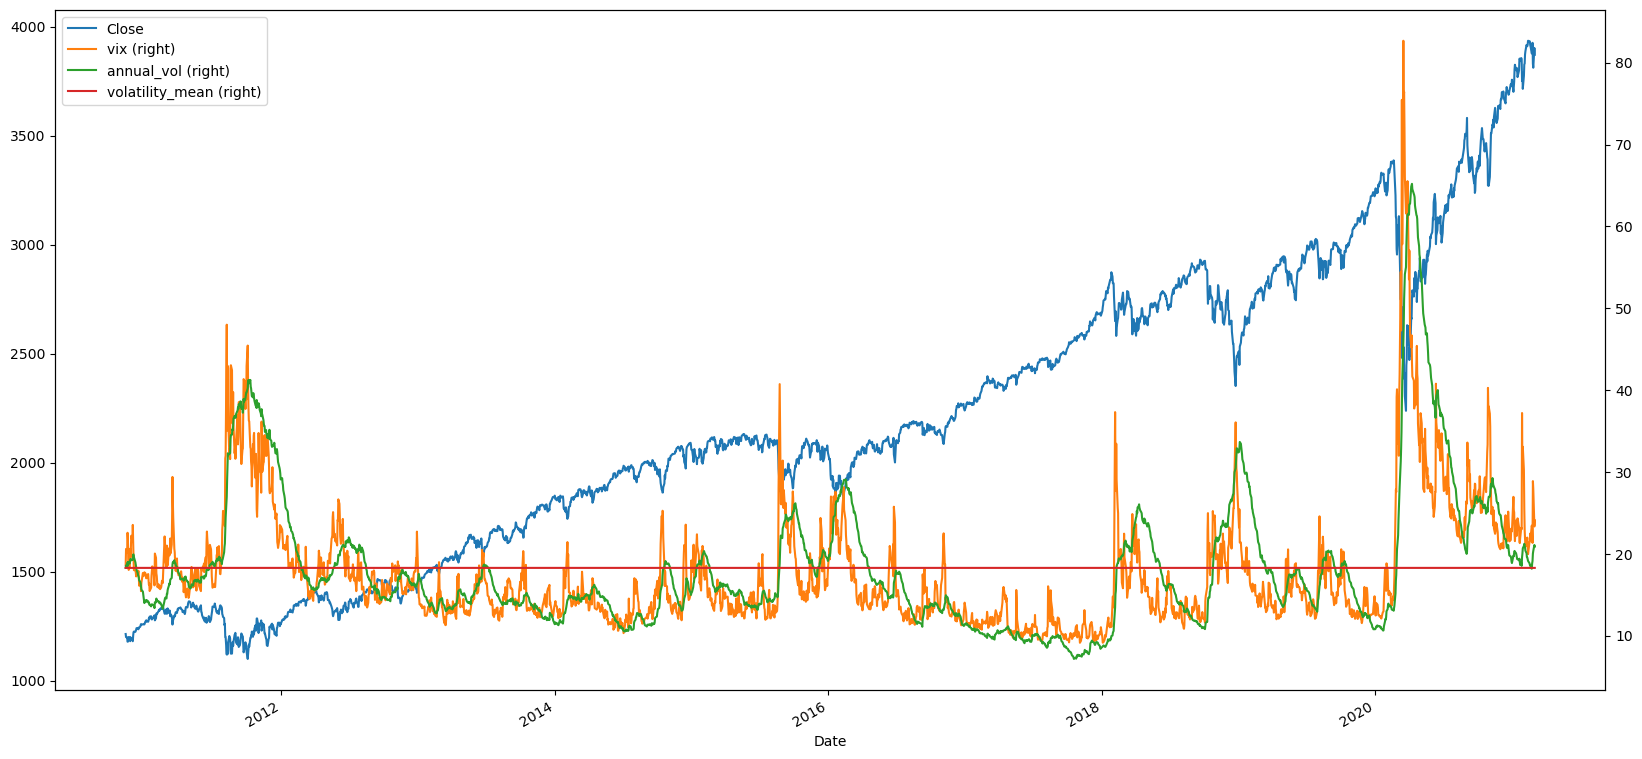

In [13]:
import yfinance as yf
import pandas_ta as ta
import math
import pandas as pd
import matplotlib.pyplot as plt

def get_indicator(q, ind_name, params):
    if ind_name == "atr":
        ts = q.ta.atr(params['length'],fillna=0)        
    return ts

window=30
df_vix=yf.download(tickers= '^VIX',start= '2010-9-1',end='2021-3-3',interval = "1d",
                     group_by = 'column',auto_adjust = True, prepost = True, 
                     proxy = None)

df=yf.download(tickers= '^GSPC',start= '2010-9-1',end='2021-3-3',interval = "1d",
                     group_by = 'column',auto_adjust = True, prepost = True, 
                     proxy = None)
df['vix']=df_vix['Close']
df['atr'] = get_indicator(df, 'atr', {'length': window})
df['avg_price']=df['Close'].rolling(window).mean()
df['annual_vol']=100*df['atr']/df['avg_price']*math.sqrt(256)
df['volatility_mean']=df['annual_vol'].mean()
df.loc[df.index>'2010-11-10'][['Close','vix','annual_vol','volatility_mean']].\
plot(secondary_y=['vix','annual_vol','volatility_mean'],figsize=(20,10))